In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV#表格搜索

In [4]:
path=r"C:\Users\xuhao_yang\PycharmProjects\sz3\data\Advertising.csv"

In [5]:
data=pd.read_csv(path)
x=data[["TV","Radio","Newspaper"]]
y=data[["Sales"]]

In [6]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False##解决中文乱码

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                               train_size=0.8,
                                               random_state=1)

C:\Users\xuhao_yang\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [8]:
model=Lasso()
alpha_scan=np.logspace(-3,2,10)
lasso_model=GridSearchCV(model,
                         param_grid={"alpha":alpha_scan},
                         cv=5)#匹配最佳的alpha
lasso_model.fit(x_train,y_train)
lasso_model.best_params_

{'alpha': 0.5994842503189409}

In [10]:
lasso_model.score(x_test,y_test)

0.8911031161434834

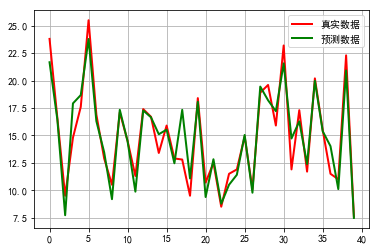

In [12]:
y_new=lasso_model.predict(x_test)
plt.figure(facecolor="w")
t=np.arange(len(x_test))
plt.plot(t,y_test,"r-",linewidth=2,label="真实数据")
plt.plot(t,y_new,"g-",linewidth=2,label="预测数据")
plt.grid()
plt.legend()
plt.show()